# Imports

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# Import Data

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
df = pd.read_csv('data.csv')

In [81]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [82]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

In [83]:
df['diagnosis'] = df['diagnosis'].astype('int64')

In [84]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Feature Selection

In [85]:
# numerical_features = [
#     'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#     'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
#     'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
#     'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
#     'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
#     'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
#     'compactness_worst', 'concavity_worst', 'concave points_worst',
#     'symmetry_worst', 'fractal_dimension_worst'
# ]

# removing features not considered as important by the models
numerical_features = ['perimeter_worst', 'concave points_mean', 'concave points_worst', 'radius_worst', 'concavity_mean',
    'smoothness_worst', 'texture_worst', 'radius_mean', 'concave points_se', 'texture_mean', 'concavity_worst',
    'perimeter_se', 'radius_se', 'area_worst', 'smoothness_mean', 'fractal_dimension_worst'
]

target = 'diagnosis'

# Train Test Split

In [86]:
X = df[numerical_features]
y = df[target]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Outlier Removal

In [11]:
# # only on the training set!!! But we won't use it on this dataset

# Numerical Transformers

In [88]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale with StandardScaler
])

# Categorical Transformers

In [89]:
# there are no categorical features

# Preprocessing Pipeline

In [90]:
# creating a preprocessor using the transformers created before
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', numeric_transformer, numerical_features),
    ])

# Modeling Functions

In [91]:
def show_results(y_test, y_pred):    
    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # 2. Classification Report (Precision, Recall, F1-Score, Support)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize Confusion Matrix using Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 4. Precision, Recall, F1-Score (Bar Chart)
    # Extract precision, recall, and F1 scores from classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = report['1']  # Or you can use 'macro avg' or other types
    
    # Plot Precision, Recall, F1-Score
    metrics_data = {
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score']
    }
    
    # Create bar chart for the metrics
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(metrics_data.keys()), y=list(metrics_data.values()))
    plt.title("Precision, Recall, F1-Score")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Limit y-axis to 0-1
    plt.show()

In [92]:
def show_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (area = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    print(f"The AUC for the Classifier is: {roc_auc:.4f}")

    # Calculate Youden's J statistic (TPR - FPR)
    j_scores = tpr - fpr
    
    # Find the index of the best threshold (maximum J score)
    best_threshold_index = np.argmax(j_scores)
    
    # The best threshold based on Youden's J
    best_threshold = thresholds[best_threshold_index]
    print(f"Best Threshold based on Youden's J statistic: {best_threshold}")

In [93]:
def show_cross_validation_stats(grid_search):     
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Print out the results of the grid search (train vs validation)
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    # Display relevant columns for overfitting check
    # We look at mean_train_score and mean_test_score for each parameter combination
    print("Top 10 Hyperparameter Combinations and their Scores:")
    print(results.sort_values(by='rank_test_score')[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(10))

    # Check the training and validation scores across different hyperparameters
    train_scores = results['mean_train_score']
    valid_scores = results['mean_test_score']
    
    # Plot the training vs validation scores
    plt.figure(figsize=(8, 6))
    plt.plot(train_scores, label='Training Scores', color='blue', marker='o')
    plt.plot(valid_scores, label='Validation Scores', color='red', marker='x')
    plt.xlabel('Grid Search Iteration')
    plt.ylabel('Score (Accuracy)')
    plt.title('Training vs Validation Scores During GridSearchCV')
    plt.legend()
    plt.show()

In [94]:
def show_hyperparameter_training_stats(grid_search, parameter):
    results = pd.DataFrame(grid_search.cv_results_)
    
    if results[f'param_classifier__{parameter}'].dtype in ['float64', 'int64']:
        # If the parameter is numeric, sort by its numerical values
        results = results.sort_values(by=f'param_classifier__{parameter}')
    else:
        # If the parameter is categorical (string), sort alphabetically
        results = results.sort_values(by=f'param_classifier__{parameter}', key=lambda x: x.str.lower())

    # Visualize the performance for specific hyperparameters
    plt.figure(figsize=(12, 6))
    plt.errorbar(results[f'param_classifier__{parameter}'].astype(str), results['mean_train_score'], yerr=results['std_train_score'], label='Mean Train Score', capsize=4, fmt='o')
    plt.errorbar(results[f'param_classifier__{parameter}'].astype(str), results['mean_test_score'], yerr=results['std_test_score'], label='Mean Test Score (Validation)', capsize=4, fmt='o')
    plt.xlabel(parameter)
    plt.ylabel('Score (Accuracy)')
    plt.title(f'Training vs. Validation Score across {parameter}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [95]:
def show_feature_importances(model):
    feature_importances = model.named_steps['classifier'].feature_importances_
    features_names = model.named_steps['preprocessor'].get_feature_names_out()
    
    importance_df = pd.DataFrame({
        'Feature': features_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df)
    
    # Plotting the horizontal bar chart
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.tight_layout()

In [96]:
report_ac = {}

# Modeling Parametrizations

In [97]:
# since we are trying to detect as many cancers as possible I will opt for a recall optimization to detect the most positive cases possible
metric_to_optimize = 'recall'

In [98]:
# we need to add the classifier__ to denote the parameter of the classifier in the pipeline
param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # smoothing values to avoid division by zero
}

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],            # Inverse of regularization strength
    'classifier__penalty': ['l2'],                       # L2 regularization (common with 'lbfgs')
    'classifier__solver': ['lbfgs'],                     # Solver that supports L2
}

param_grid_dt = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

param_grid_svc = {
    'classifier__C': [0.01, 0.1, 0.5, 1],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],           # Number of trees
    'classifier__max_depth': [5, 10, 20],                 # Max depth of the tree
    'classifier__min_samples_split': [2, 5],              # Min samples to split an internal node
    'classifier__min_samples_leaf': [1, 2],               # Min samples at a leaf node
    'classifier__max_features': ['sqrt', 'log2'],         # Number of features to consider at each split
}

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Naive Bayes

In [99]:
nb_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [100]:
grid_search_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid_nb,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [101]:
grid_search_nb.fit(X_train, y_train)

nb_model = grid_search_nb.best_estimator_

y_pred_nb = nb_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [102]:
accuracy = accuracy_score(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Naive Bayes'] = report

{'precision': 0.84375, 'recall': 0.8181818181818182, 'f1-score': 0.8307692307692308, 'support': 33.0, 'accuracy': 0.9035087719298246}


Accuracy: 0.9035

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.84      0.82      0.83        33

    accuracy                           0.90       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.90      0.90      0.90       114



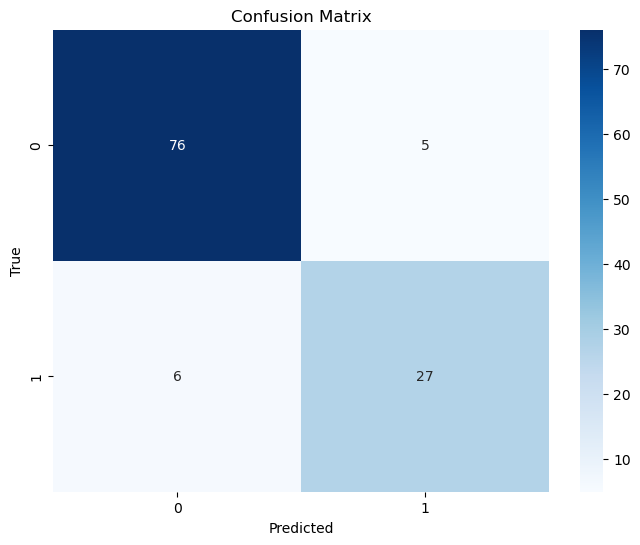

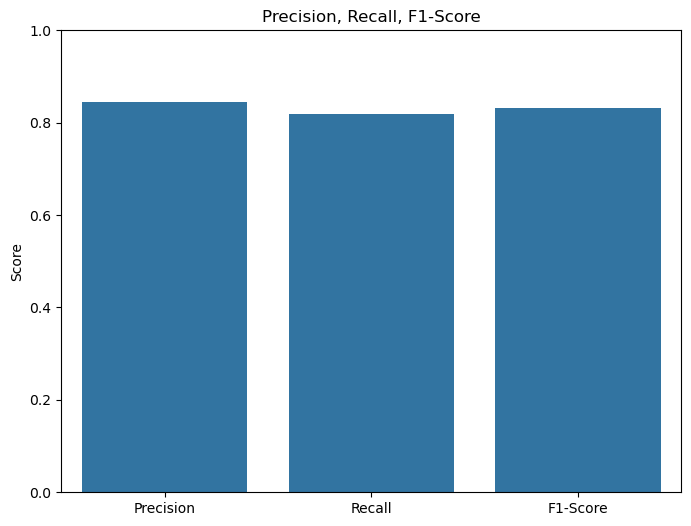

In [103]:
show_results(y_test, y_pred_nb)

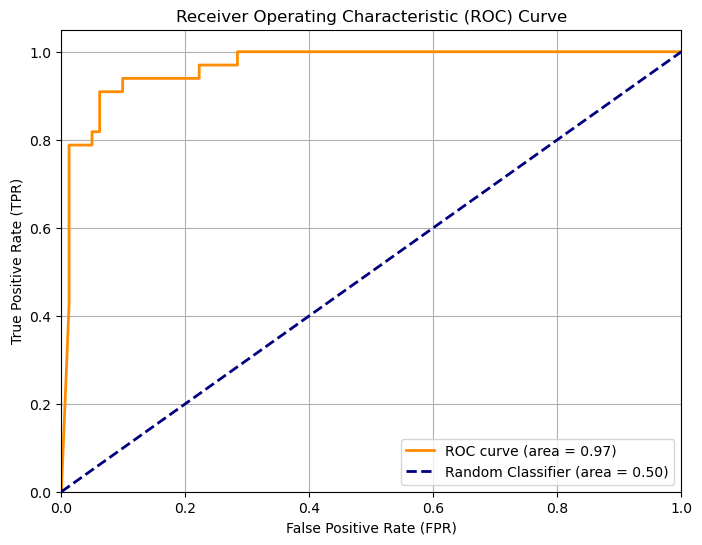

The AUC for the Classifier is: 0.9675
Best Threshold based on Youden's J statistic: 0.020798895228868935


In [104]:
show_roc_curve(nb_model, X_test, y_test)

Best parameters: {'classifier__var_smoothing': 1e-09}
Best cross-validation score: 0.921904761904762
Top 10 Hyperparameter Combinations and their Scores:
                                 params  mean_train_score  std_train_score  \
0  {'classifier__var_smoothing': 1e-09}          0.927399         0.013537   
1  {'classifier__var_smoothing': 1e-08}          0.927399         0.013537   
2  {'classifier__var_smoothing': 1e-07}          0.927399         0.013537   
3  {'classifier__var_smoothing': 1e-06}          0.927399         0.013537   
4  {'classifier__var_smoothing': 1e-05}          0.927399         0.013537   

   mean_test_score  std_test_score  rank_test_score  
0         0.921905        0.047647                1  
1         0.921905        0.047647                1  
2         0.921905        0.047647                1  
3         0.921905        0.047647                1  
4         0.921905        0.047647                1  


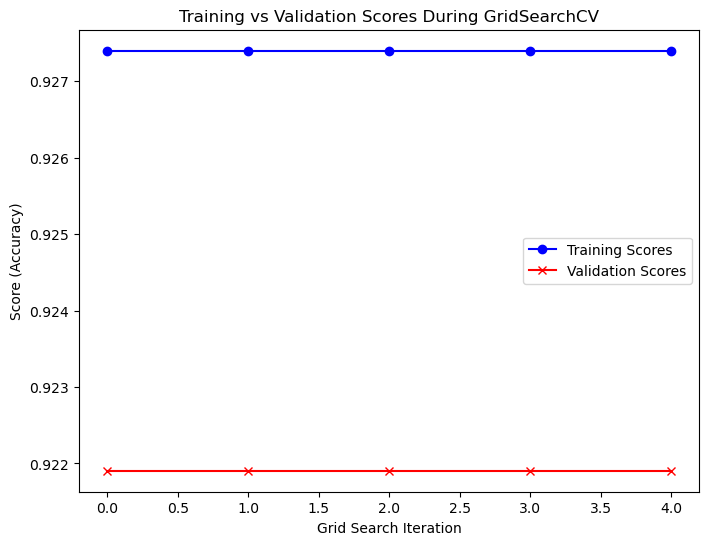

In [105]:
show_cross_validation_stats(grid_search_nb)

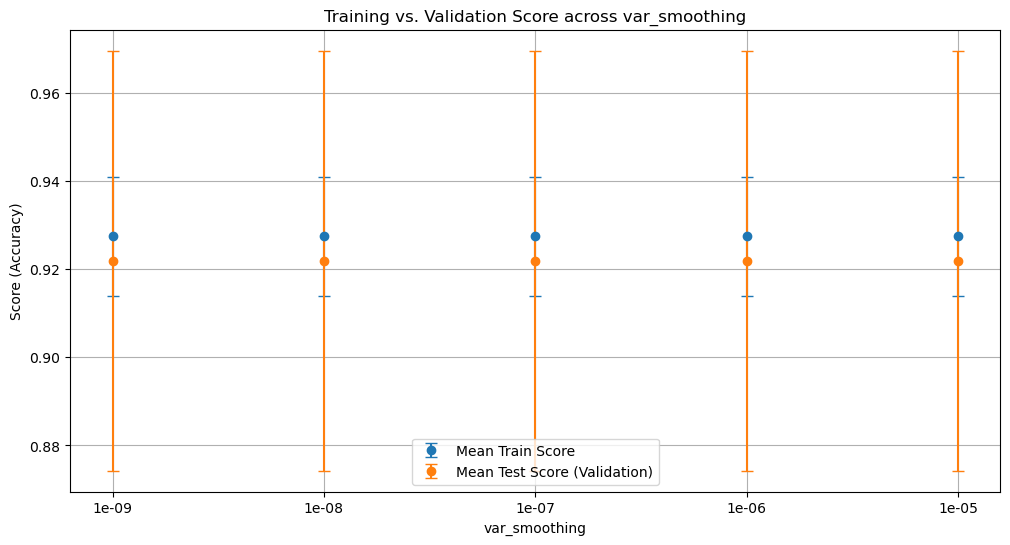

In [106]:
show_hyperparameter_training_stats(grid_search_nb, 'var_smoothing')

# Logistic Regression

In [107]:
lr_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [108]:
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [109]:
grid_search_lr.fit(X_train, y_train)

lr_model = grid_search_lr.best_estimator_

y_pred_lr = lr_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [110]:
accuracy = accuracy_score(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Logistic Regression'] = report

{'precision': 0.9666666666666667, 'recall': 0.8787878787878788, 'f1-score': 0.9206349206349206, 'support': 33.0, 'accuracy': 0.956140350877193}


Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.97      0.88      0.92        33

    accuracy                           0.96       114
   macro avg       0.96      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



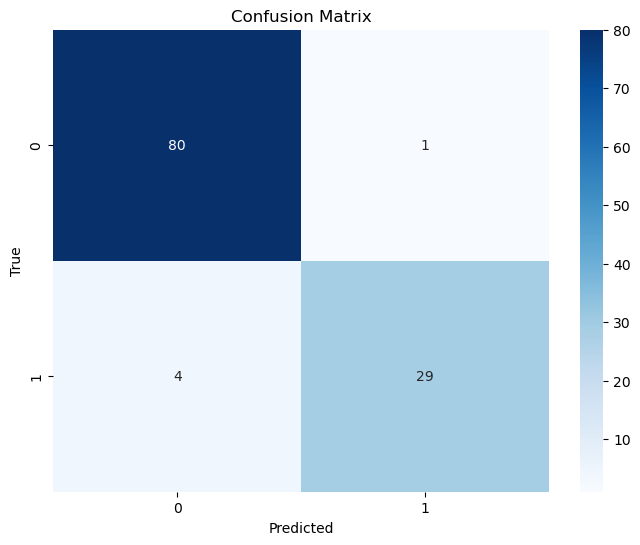

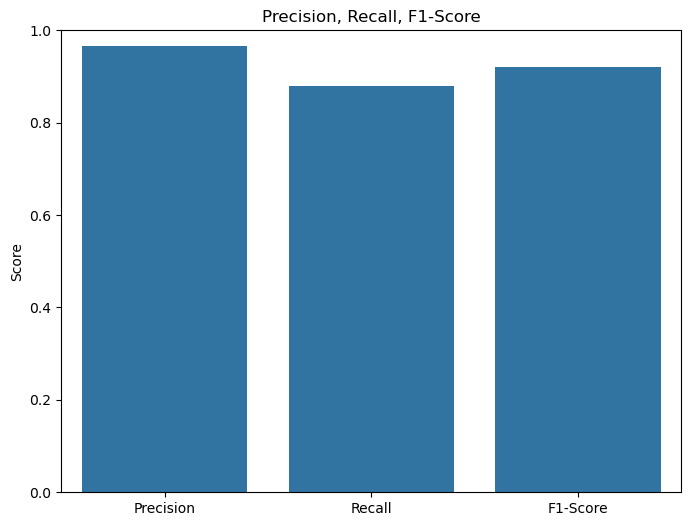

In [111]:
show_results(y_test, y_pred_lr)

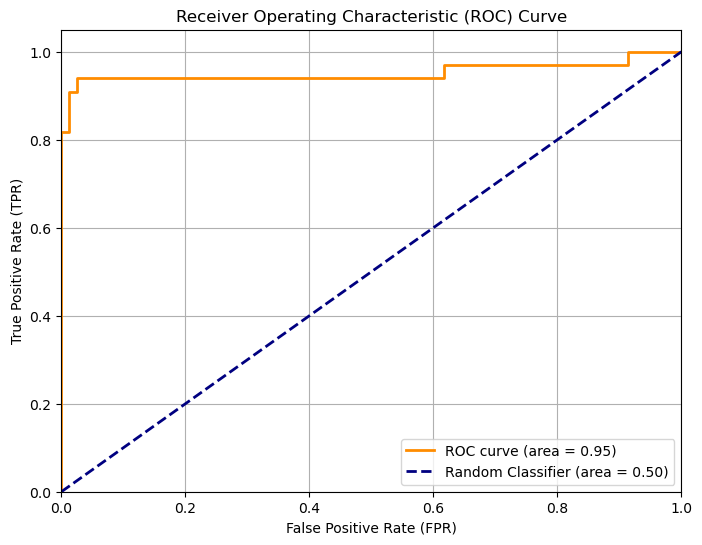

The AUC for the Classifier is: 0.9517
Best Threshold based on Youden's J statistic: 0.050531181167065856


In [112]:
show_roc_curve(lr_model, X_test, y_test)

Best parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.9833333333333332
Top 10 Hyperparameter Combinations and their Scores:
                                              params  mean_train_score  \
4  {'classifier__C': 100, 'classifier__penalty': ...          0.983246   
3  {'classifier__C': 10, 'classifier__penalty': '...          0.980449   
2  {'classifier__C': 1, 'classifier__penalty': 'l...          0.966482   
1  {'classifier__C': 0.1, 'classifier__penalty': ...          0.946950   
0  {'classifier__C': 0.01, 'classifier__penalty':...          0.882702   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
4         0.003390         0.983333        0.013608                1  
3         0.005226         0.966667        0.020787                2  
2         0.002775         0.961111        0.022222                3  
1         0.009314         0.938889        0.044444                4  

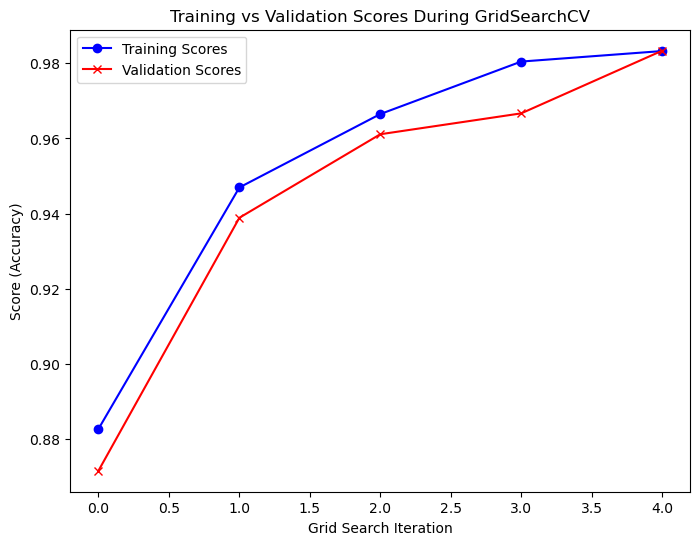

In [113]:
show_cross_validation_stats(grid_search_lr)

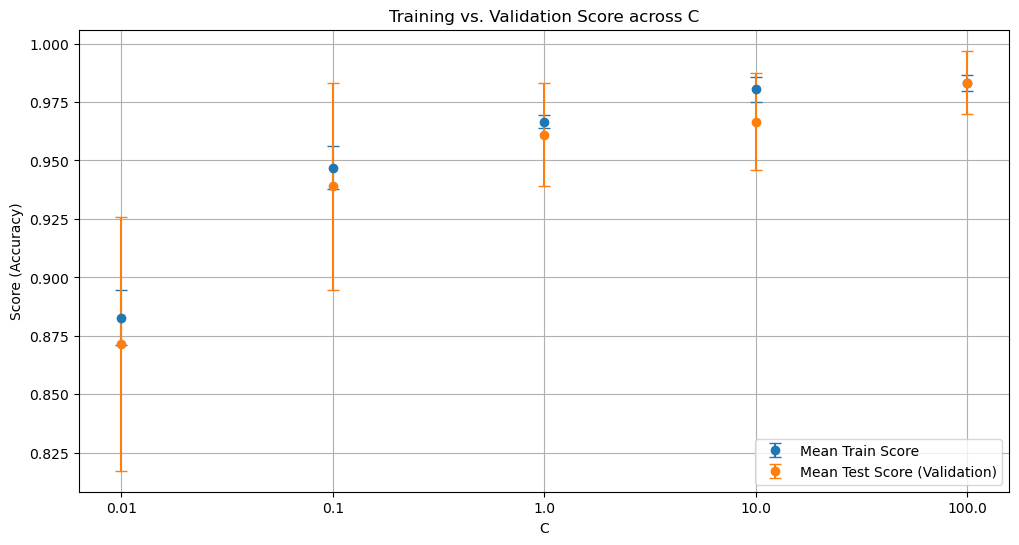

In [114]:
show_hyperparameter_training_stats(grid_search_lr, 'C')

# Decision Tree

In [115]:
dt_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [116]:
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,                
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,           
    verbose=1
)

In [117]:
grid_search_dt.fit(X_train, y_train)

dt_model = grid_search_dt.best_estimator_

y_pred_dt = dt_model.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [118]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Decision Tree'] = report

{'precision': 0.9230769230769231, 'recall': 0.7272727272727273, 'f1-score': 0.8135593220338984, 'support': 33.0, 'accuracy': 0.9035087719298246}


Accuracy: 0.9035

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        81
           1       0.92      0.73      0.81        33

    accuracy                           0.90       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.91      0.90      0.90       114



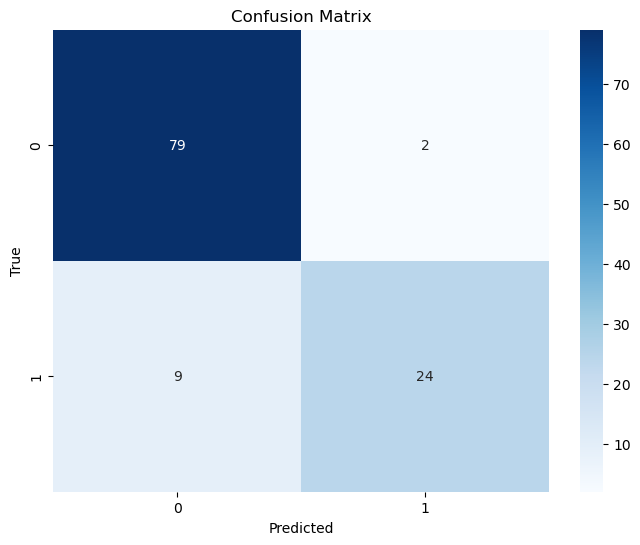

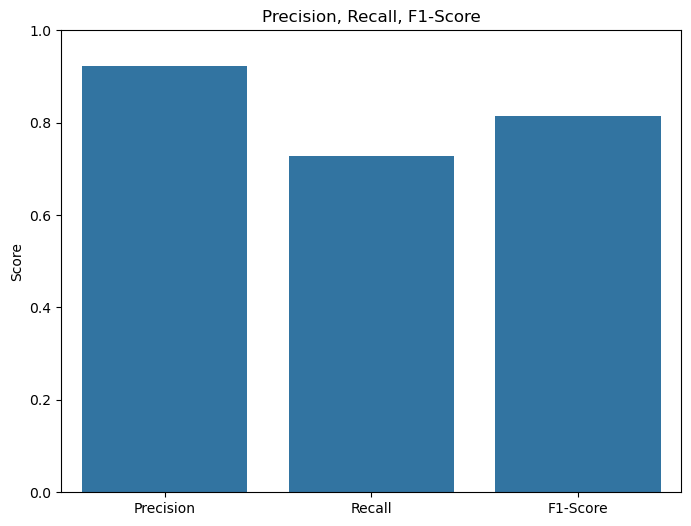

In [119]:
show_results(y_test, y_pred_dt)

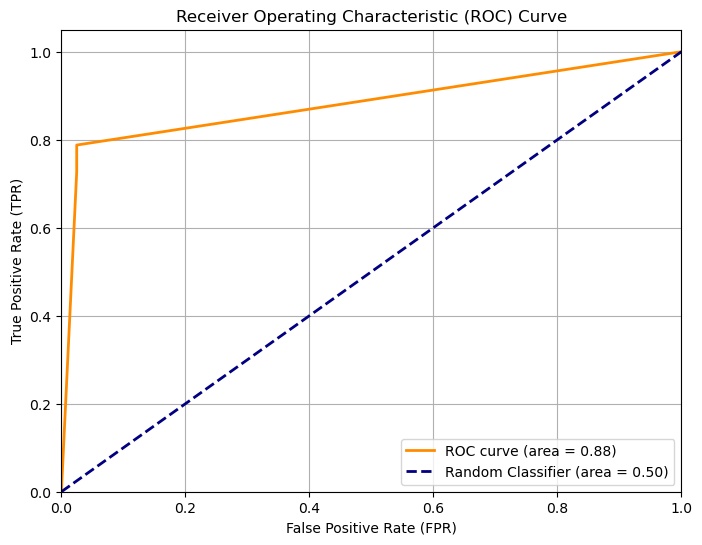

The AUC for the Classifier is: 0.8808
Best Threshold based on Youden's J statistic: 0.5


In [120]:
show_roc_curve(dt_model, X_test, y_test)

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.9442857142857143
Top 10 Hyperparameter Combinations and their Scores:
                                               params  mean_train_score  \
48  {'classifier__criterion': 'entropy', 'classifi...          0.991618   
39  {'classifier__criterion': 'entropy', 'classifi...          0.991618   
49  {'classifier__criterion': 'entropy', 'classifi...          0.994415   
21  {'classifier__criterion': 'gini', 'classifier_...          0.984635   
40  {'classifier__criterion': 'entropy', 'classifi...          0.994415   
46  {'classifier__criterion': 'entropy', 'classifi...          0.998601   
36  {'classifier__criterion': 'entropy', 'classifi...          1.000000   
31  {'classifier__criterion': 'entropy', 'classifi...          0.983265   
37  {'classifier__criterion': 'entropy', 'classifi...          0.99860

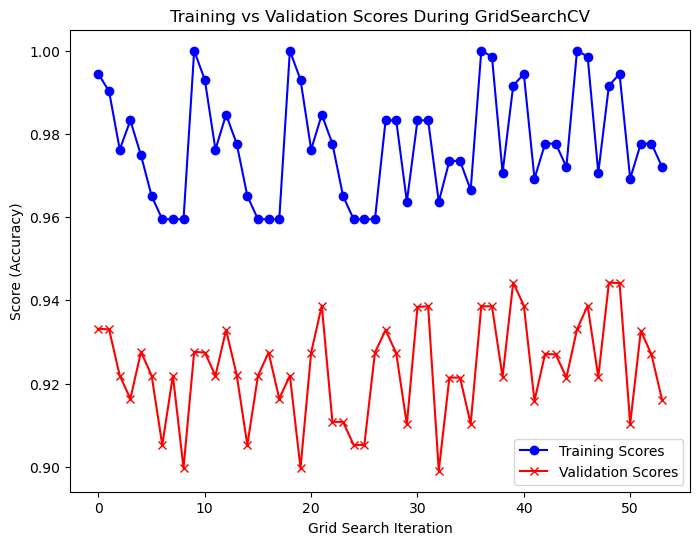

In [121]:
show_cross_validation_stats(grid_search_dt)

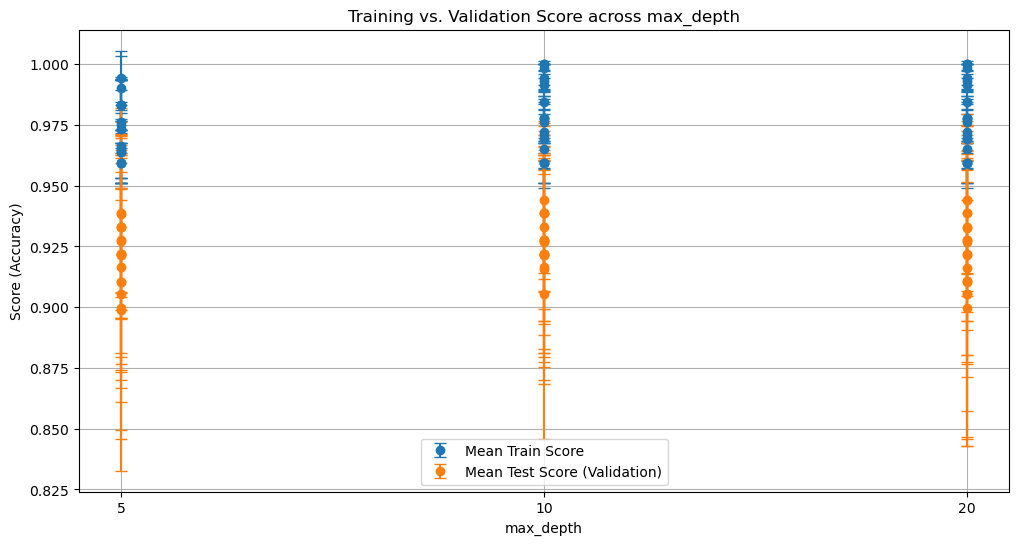

In [122]:
show_hyperparameter_training_stats(grid_search_dt, 'max_depth')

                                     Feature  Importance
2      num_transformer__concave points_worst    0.687431
0           num_transformer__perimeter_worst    0.206260
6             num_transformer__texture_worst    0.044878
15  num_transformer__fractal_dimension_worst    0.026522
13               num_transformer__area_worst    0.023952
11             num_transformer__perimeter_se    0.004379
7               num_transformer__radius_mean    0.003709
3              num_transformer__radius_worst    0.002869
4            num_transformer__concavity_mean    0.000000
5          num_transformer__smoothness_worst    0.000000
1       num_transformer__concave points_mean    0.000000
8         num_transformer__concave points_se    0.000000
10          num_transformer__concavity_worst    0.000000
9              num_transformer__texture_mean    0.000000
12                num_transformer__radius_se    0.000000
14          num_transformer__smoothness_mean    0.000000


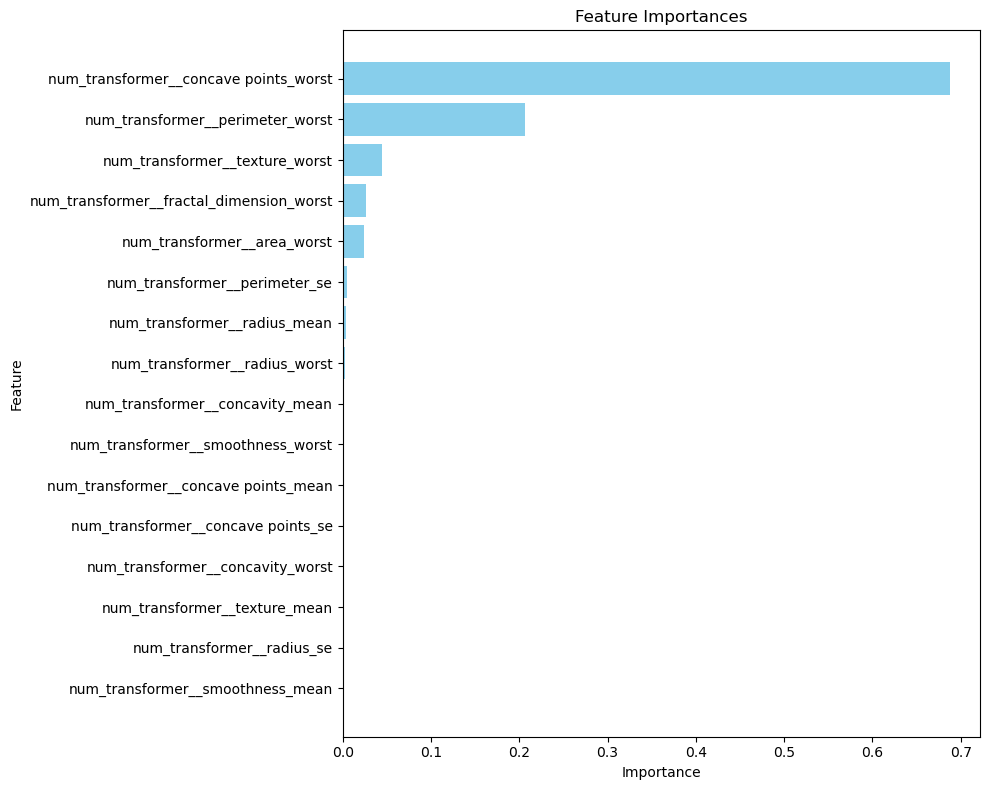

In [123]:
show_feature_importances(dt_model)

# Support Vector Machine

In [124]:
svc_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

In [125]:
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [126]:
grid_search_svc.fit(X_train, y_train)

svc_model = grid_search_svc.best_estimator_

y_pred_svc = svc_model.predict(X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [127]:
accuracy = accuracy_score(y_test, y_pred_svc)
report = classification_report(y_test, y_pred_svc, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Support Vector Machine'] = report

{'precision': 0.8055555555555556, 'recall': 0.8787878787878788, 'f1-score': 0.8405797101449275, 'support': 33.0, 'accuracy': 0.9035087719298246}


Accuracy: 0.9035

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        81
           1       0.81      0.88      0.84        33

    accuracy                           0.90       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.91      0.90      0.90       114



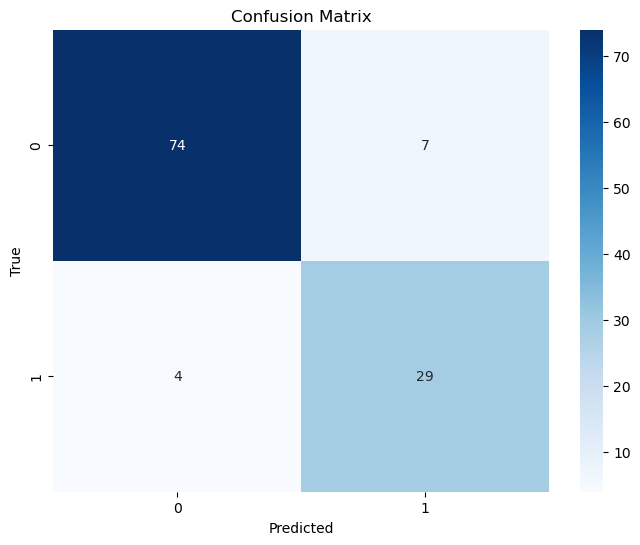

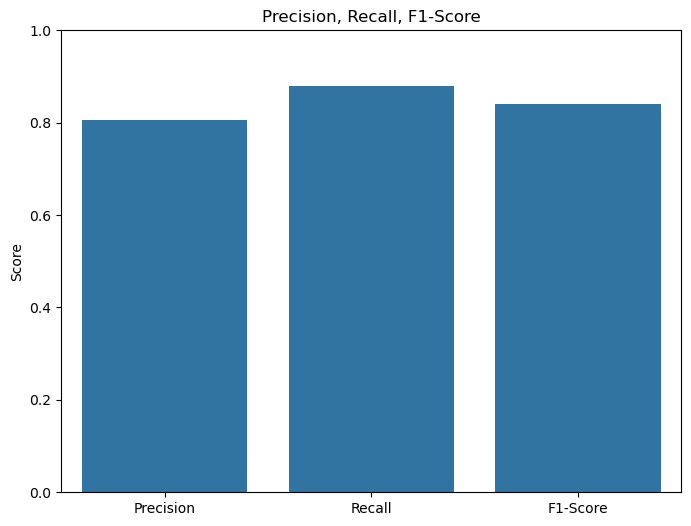

In [128]:
show_results(y_test, y_pred_svc)

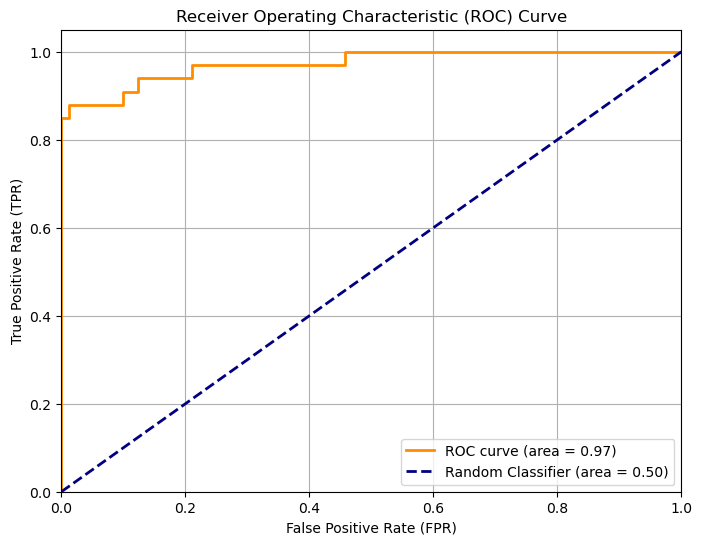

The AUC for the Classifier is: 0.9727
Best Threshold based on Youden's J statistic: 0.7005073293044634


In [129]:
show_roc_curve(svc_model, X_test, y_test)

Best parameters: {'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.9722222222222221
Top 10 Hyperparameter Combinations and their Scores:
                                               params  mean_train_score  \
38  {'classifier__C': 1, 'classifier__gamma': 1, '...          1.000000   
26  {'classifier__C': 0.5, 'classifier__gamma': 0....          0.973475   
32  {'classifier__C': 1, 'classifier__gamma': 'aut...          0.967890   
30  {'classifier__C': 1, 'classifier__gamma': 'sca...          0.967890   
36  {'classifier__C': 1, 'classifier__gamma': 0.1,...          0.979050   
33  {'classifier__C': 1, 'classifier__gamma': 'aut...          0.966492   
31  {'classifier__C': 1, 'classifier__gamma': 'sca...          0.966492   
37  {'classifier__C': 1, 'classifier__gamma': 0.1,...          0.966492   
35  {'classifier__C': 1, 'classifier__gamma': 0.01...          0.966492   
39  {'classifier__C': 1, 'classifier__gamma': 1, '...     

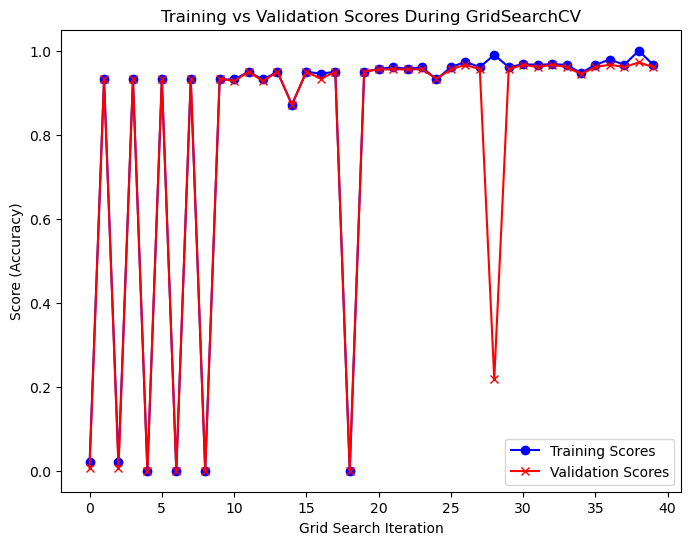

In [130]:
show_cross_validation_stats(grid_search_svc)

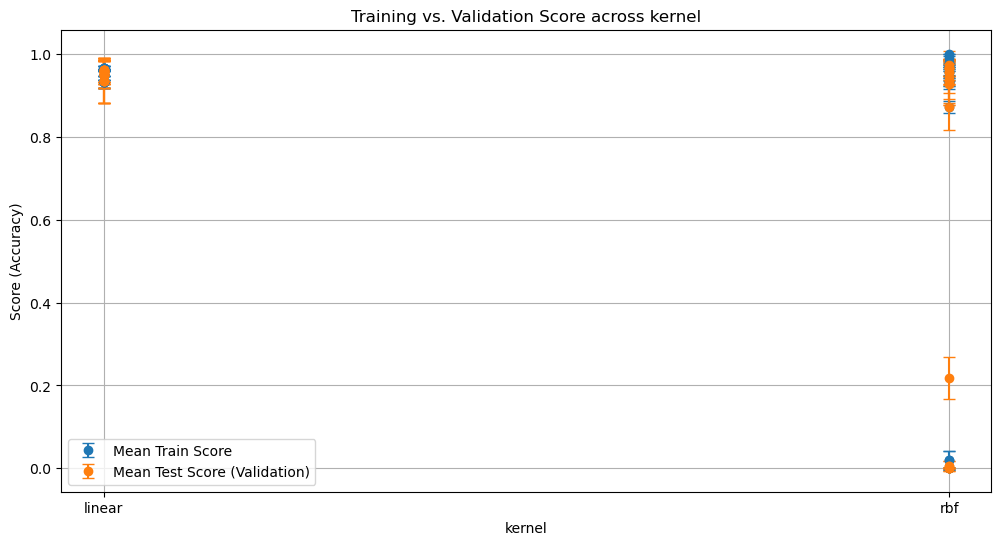

In [131]:
show_hyperparameter_training_stats(grid_search_svc, 'kernel')

# Random Forest

In [132]:
rf_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [133]:
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [134]:
grid_search_rf.fit(X_train, y_train)

rf_model = grid_search_rf.best_estimator_

y_pred_rf = rf_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [135]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Random Forest'] = report

{'precision': 1.0, 'recall': 0.8787878787878788, 'f1-score': 0.9354838709677419, 'support': 33.0, 'accuracy': 0.9649122807017544}


Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.88      0.94        33

    accuracy                           0.96       114
   macro avg       0.98      0.94      0.96       114
weighted avg       0.97      0.96      0.96       114



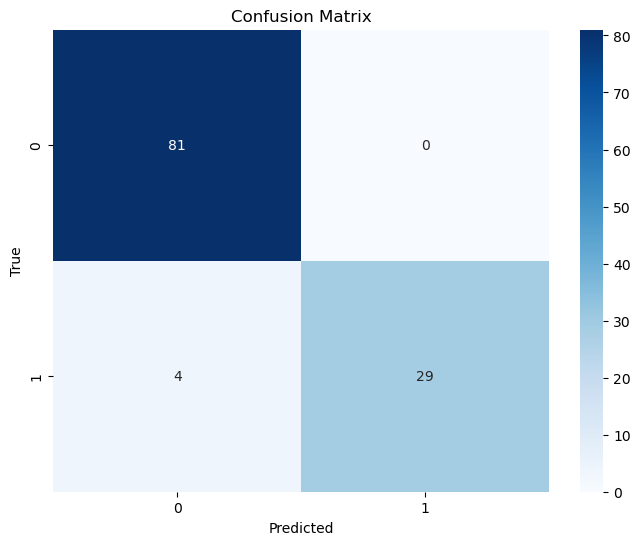

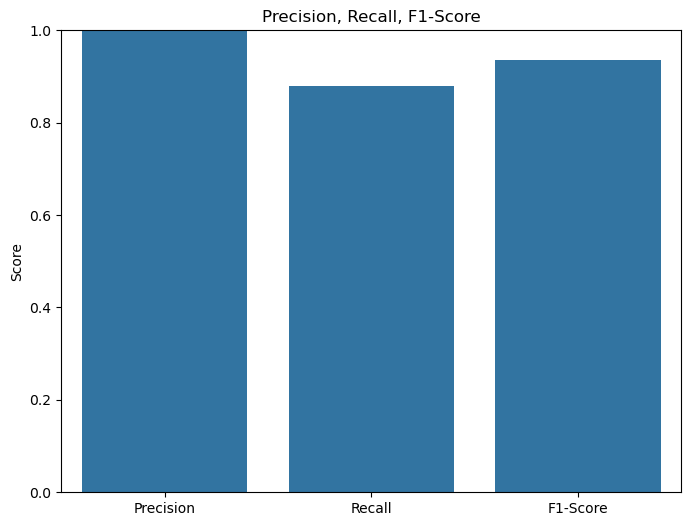

In [136]:
show_results(y_test, y_pred_rf)

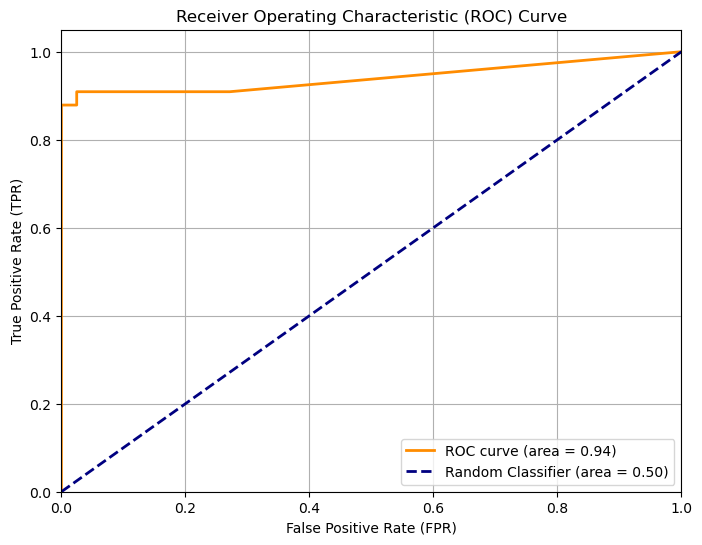

The AUC for the Classifier is: 0.9415
Best Threshold based on Youden's J statistic: 0.36


In [137]:
show_roc_curve(rf_model, X_test, y_test)

Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation score: 0.961111111111111
Top 10 Hyperparameter Combinations and their Scores:
                                               params  mean_train_score  \
24  {'classifier__max_depth': 10, 'classifier__max...          1.000000   
58  {'classifier__max_depth': 20, 'classifier__max...          0.994415   
52  {'classifier__max_depth': 20, 'classifier__max...          1.000000   
1   {'classifier__max_depth': 5, 'classifier__max_...          0.997203   
18  {'classifier__max_depth': 5, 'classifier__max_...          0.995814   
23  {'classifier__max_depth': 5, 'classifier__max_...          0.994415   
12  {'classifier__max_depth': 5, 'classifier__max_...          0.998601   
13  {'classifier__max_depth': 5, 'classifier__max_...          0.998601   
21  {'classifier__max_depth': 5, 'class

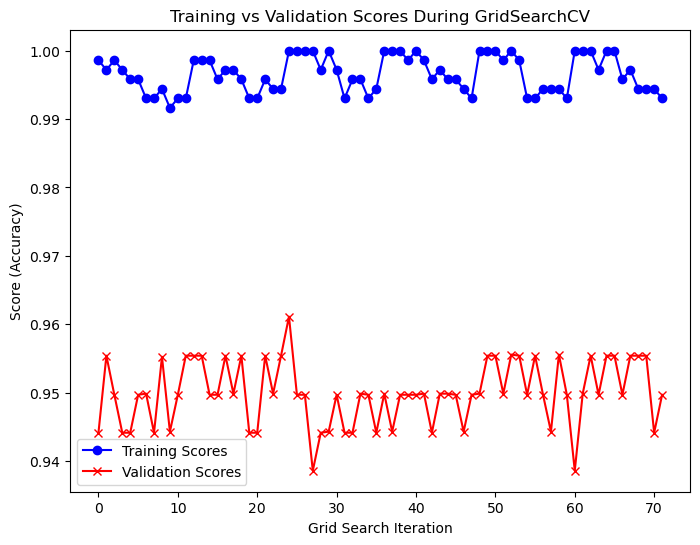

In [138]:
show_cross_validation_stats(grid_search_rf)

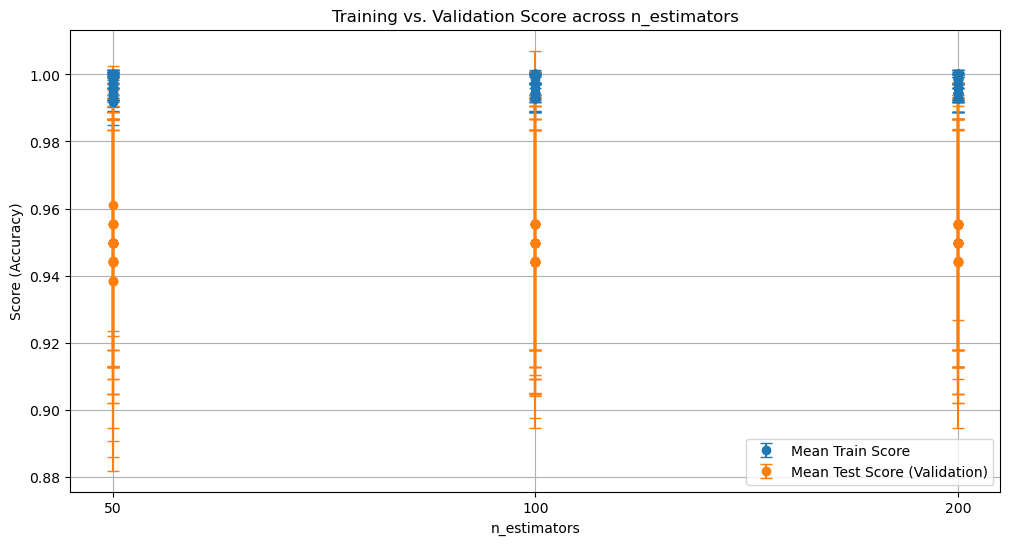

In [139]:
show_hyperparameter_training_stats(grid_search_rf, 'n_estimators')

                                     Feature  Importance
0           num_transformer__perimeter_worst    0.174304
2      num_transformer__concave points_worst    0.166219
13               num_transformer__area_worst    0.163232
3              num_transformer__radius_worst    0.136880
4            num_transformer__concavity_mean    0.118415
1       num_transformer__concave points_mean    0.089226
10          num_transformer__concavity_worst    0.048673
6             num_transformer__texture_worst    0.020583
12                num_transformer__radius_se    0.015585
7               num_transformer__radius_mean    0.014516
9              num_transformer__texture_mean    0.014363
5          num_transformer__smoothness_worst    0.013213
11             num_transformer__perimeter_se    0.007680
15  num_transformer__fractal_dimension_worst    0.006676
14          num_transformer__smoothness_mean    0.006230
8         num_transformer__concave points_se    0.004207


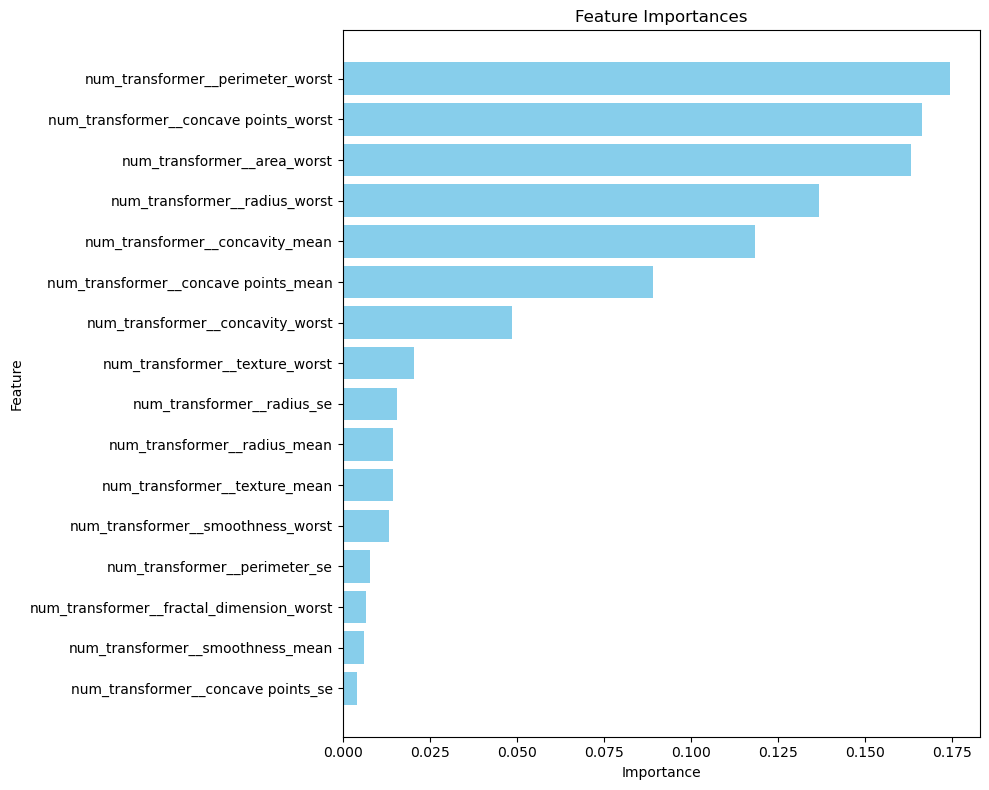

In [140]:
show_feature_importances(rf_model)

# XGBoost

In [141]:
xgb_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss'))
])

In [142]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [143]:
grid_search_xgb.fit(X_train, y_train)

xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = xgb_model.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [144]:
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['XGBoost'] = report

{'precision': 0.9666666666666667, 'recall': 0.8787878787878788, 'f1-score': 0.9206349206349206, 'support': 33.0, 'accuracy': 0.956140350877193}


Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.97      0.88      0.92        33

    accuracy                           0.96       114
   macro avg       0.96      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



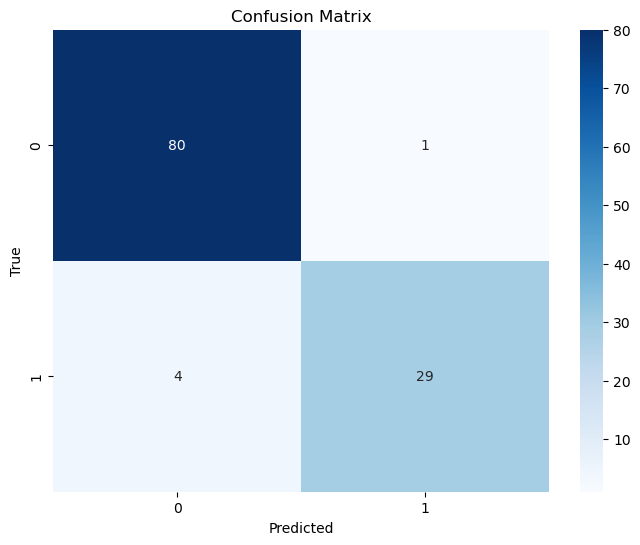

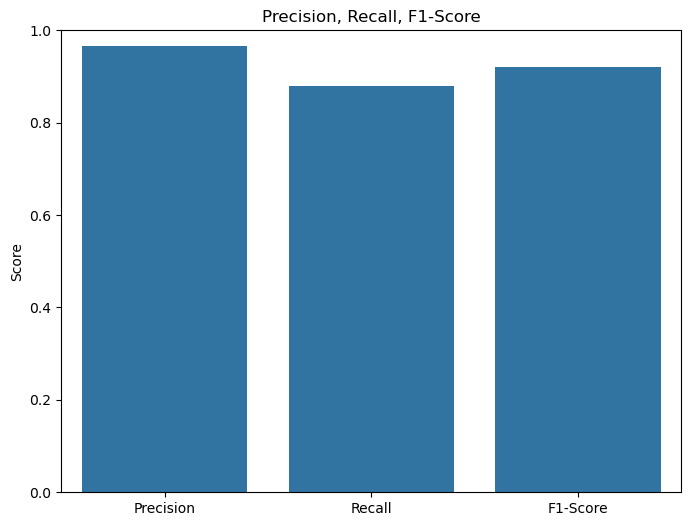

In [145]:
show_results(y_test, y_pred_xgb)

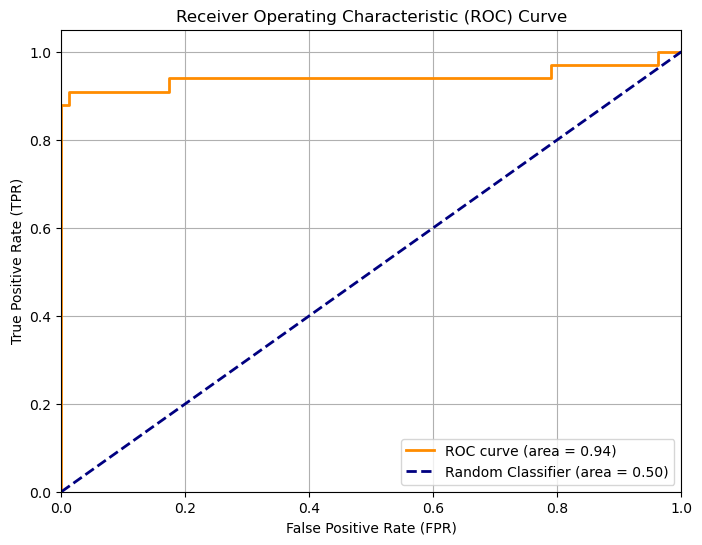

The AUC for the Classifier is: 0.9413
Best Threshold based on Youden's J statistic: 0.3092345595359802


In [146]:
show_roc_curve(xgb_model, X_test, y_test)

Best parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Best cross-validation score: 0.9722222222222221
Top 10 Hyperparameter Combinations and their Scores:
                                                params  mean_train_score  \
135  {'classifier__colsample_bytree': 1.0, 'classif...               1.0   
141  {'classifier__colsample_bytree': 1.0, 'classif...               1.0   
129  {'classifier__colsample_bytree': 1.0, 'classif...               1.0   
28   {'classifier__colsample_bytree': 0.8, 'classif...               1.0   
61   {'classifier__colsample_bytree': 0.8, 'classif...               1.0   
63   {'classifier__colsample_bytree': 0.8, 'classif...               1.0   
50   {'classifier__colsample_bytree': 0.8, 'classif...               1.0   
55   {'classifier__colsample_bytree': 0.8, 'classif...               1.0   
101  {'classifier__colsample_bytree

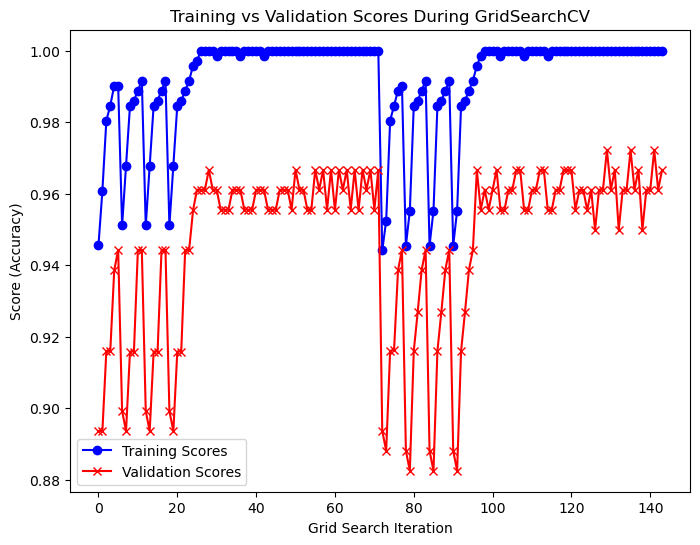

In [147]:
show_cross_validation_stats(grid_search_xgb)

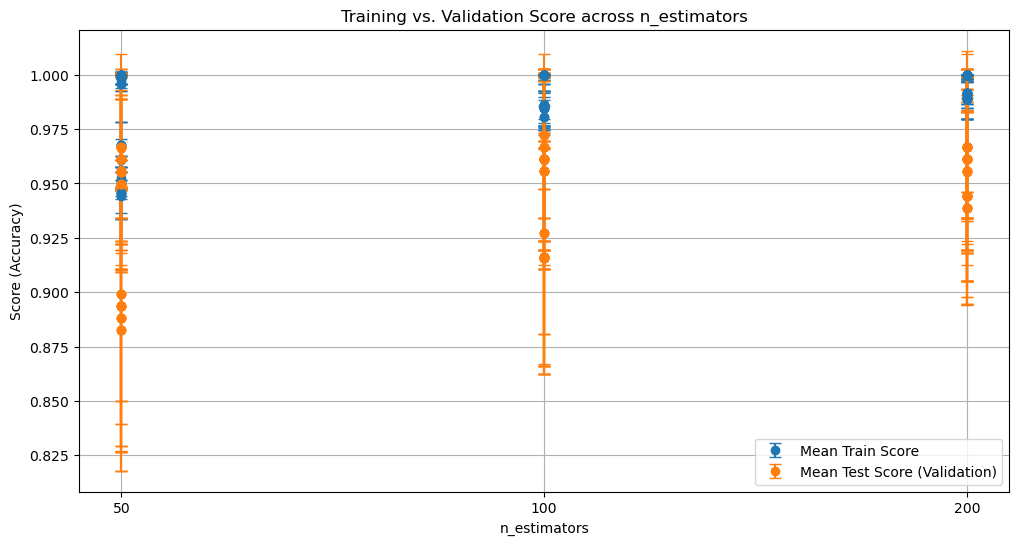

In [148]:
show_hyperparameter_training_stats(grid_search_xgb, 'n_estimators')

                                     Feature  Importance
2      num_transformer__concave points_worst    0.437911
0           num_transformer__perimeter_worst    0.249917
3              num_transformer__radius_worst    0.089058
10          num_transformer__concavity_worst    0.047148
13               num_transformer__area_worst    0.031215
1       num_transformer__concave points_mean    0.029340
4            num_transformer__concavity_mean    0.024590
6             num_transformer__texture_worst    0.023038
9              num_transformer__texture_mean    0.017668
8         num_transformer__concave points_se    0.012207
5          num_transformer__smoothness_worst    0.010066
7               num_transformer__radius_mean    0.009471
14          num_transformer__smoothness_mean    0.008322
15  num_transformer__fractal_dimension_worst    0.006147
11             num_transformer__perimeter_se    0.002211
12                num_transformer__radius_se    0.001691


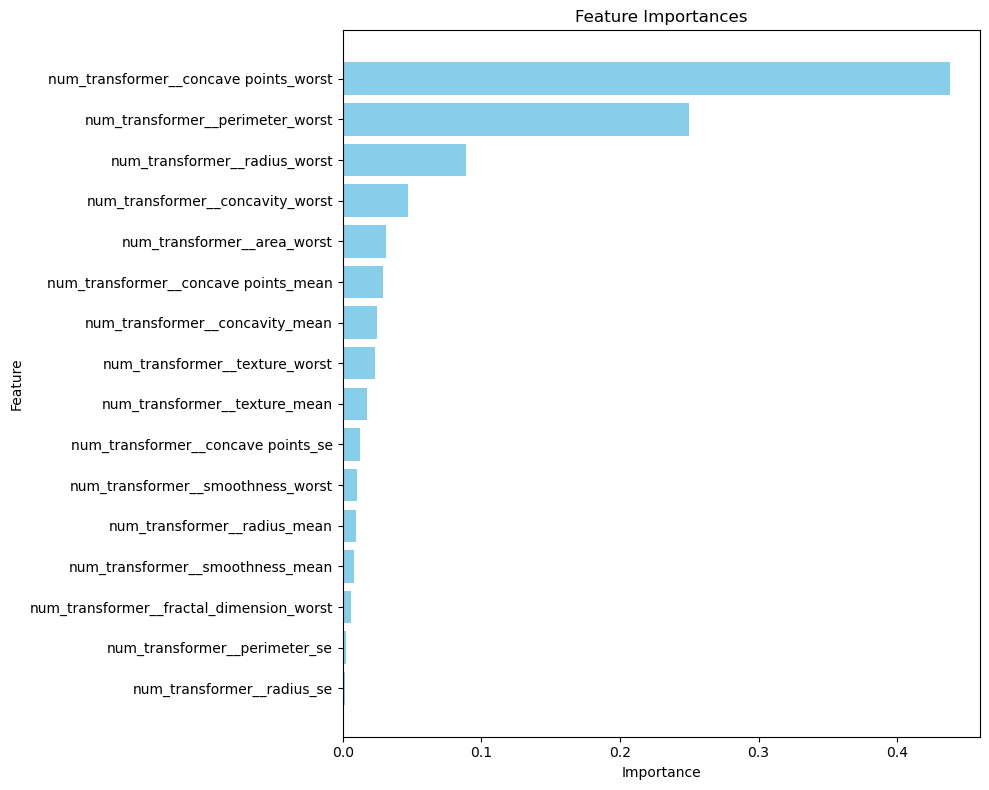

In [149]:
show_feature_importances(xgb_model)

# Model Evaluation

In [150]:
# Results with the most important features
report_ac

{'Naive Bayes': {'precision': 0.84375,
  'recall': 0.8181818181818182,
  'f1-score': 0.8307692307692308,
  'support': 33.0,
  'accuracy': 0.9035087719298246},
 'Logistic Regression': {'precision': 0.9666666666666667,
  'recall': 0.8787878787878788,
  'f1-score': 0.9206349206349206,
  'support': 33.0,
  'accuracy': 0.956140350877193},
 'Decision Tree': {'precision': 0.9230769230769231,
  'recall': 0.7272727272727273,
  'f1-score': 0.8135593220338984,
  'support': 33.0,
  'accuracy': 0.9035087719298246},
 'Support Vector Machine': {'precision': 0.8055555555555556,
  'recall': 0.8787878787878788,
  'f1-score': 0.8405797101449275,
  'support': 33.0,
  'accuracy': 0.9035087719298246},
 'Random Forest': {'precision': 1.0,
  'recall': 0.8787878787878788,
  'f1-score': 0.9354838709677419,
  'support': 33.0,
  'accuracy': 0.9649122807017544},
 'XGBoost': {'precision': 0.9666666666666667,
  'recall': 0.8787878787878788,
  'f1-score': 0.9206349206349206,
  'support': 33.0,
  'accuracy': 0.9561403

In [77]:
# Results using every variable
report_ac

{'Naive Bayes': {'precision': 0.925,
  'recall': 0.8604651162790697,
  'f1-score': 0.891566265060241,
  'support': 43.0,
  'accuracy': 0.9210526315789473},
 'Logistic Regression': {'precision': 0.9523809523809523,
  'recall': 0.9302325581395349,
  'f1-score': 0.9411764705882353,
  'support': 43.0,
  'accuracy': 0.956140350877193},
 'Decision Tree': {'precision': 0.9473684210526315,
  'recall': 0.8372093023255814,
  'f1-score': 0.8888888888888888,
  'support': 43.0,
  'accuracy': 0.9210526315789473},
 'Support Vector Machine': {'precision': 0.9090909090909091,
  'recall': 0.9302325581395349,
  'f1-score': 0.9195402298850575,
  'support': 43.0,
  'accuracy': 0.9385964912280702},
 'Random Forest': {'precision': 0.975,
  'recall': 0.9069767441860465,
  'f1-score': 0.9397590361445783,
  'support': 43.0,
  'accuracy': 0.956140350877193},
 'XGBoost': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809523,
  'support': 43.0,
  'accuracy': 0.9649122807